# Assignment 7

Seth Spire

Questions: 1, 2, 3, 8, 10

### Do any five.

In [22]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy as sp 

## 1. 

- What is the expected value of a single die roll? 

> $\mathbb{E}$[roll] = 1(1/6) + 2(1/6) + 3(1/6) + 4(1/6) + 5(1/6) + 6(1/6) = 3.5

- What is the expected value of rolling two dice and adding the results together?

> $\mathbb{E}$[sum_2_rolls] = 2(1/36) + 3(2/36) + 4(3/36) + 5(4/36) + 6(5/36) + 7(6/36) + 8(5/36) + 9(4/36) + 10(3/36) + 11(2/36) + 12(1/36) = 7

- What is the expected winnings of any gamble in European roulette?

> Assume number of spaces betting on is K. Probability of winning is K/37, with a win yieldin $36/K - $1 (initial bet). Probability of lossing is 1-K/37, with a loss being -$1 from initial bet.

> $\mathbb{E}$[roulette] = $\mathbb{E}$[win] + $\mathbb{E}$[loss] = (K/37)(36/K - 1) + (1-K/37)(-1) = (K/37)(36/K) - (K/37) - 1 + K/37 = 36K/37K - 1 = 36/37 - 1 = -1/37 = -$0.027

- Imagine you roll a die, and you record the value you get. But, if you roll a six, you roll again, and add that value. What is the expected value?

> So we already got $\mathbb{E}$[roll], $\mathbb{E}$[roll_reroll6] would be $\mathbb{E}$[roll] with the value of of 6 being 6+$\mathbb{E}$[roll]

> $\mathbb{E}$[roll_reroll6] = 1(1/6) + 2(1/6) + 3(1/6) + 4(1/6) + 5(1/6) + (6+$\mathbb{E}$[roll])(1/6)

> $\mathbb{E}$[roll_reroll6] = 1(1/6) + 2(1/6) + 3(1/6) + 4(1/6) + 5(1/6) + (6 + (1(1/6) + 2(1/6) + 3(1/6) + 4(1/6) + 5(1/6) + 6(1/6)))(1/6)

> $\mathbb{E}$[roll_reroll6] = 1(1/6) + 2(1/6) + 3(1/6) + 4(1/6) + 5(1/6) + (6 + 3.5)(1/6)

> $\mathbb{E}$[roll_reroll6] = 4.083


- Imagine that the process described in the last question continues until you fail to roll a six. What is the expected value of the process? (This can be tricky, you can simulate it to get an answer if you prefer. Hint: The answer is 4.2.)

> So I think this would have to be defined recursively.

> $\mathbb{E}$[reroll_till_not_6] = 1(1/6) + 2(1/6) + 3(1/6) + 4(1/6) + 5(1/6) + (6 + $\mathbb{E}$[reroll_till_not_6])(1/6)

> $\mathbb{E}$[reroll_till_not_6] = 3.5 + $\mathbb{E}$[reroll_till_not_6]*(1/6)

> (5/6)*$\mathbb{E}$[reroll_till_not_6] = 3.5

> $\mathbb{E}$[reroll_till_not_6] = 4.2

In [4]:
# or by simulation:
rng = np.random.default_rng(123)

num_samples = 1000000

sum_total = 0
for i in range(num_samples):
    roll_total = 0
    hit_non_six = False

    while not hit_non_six:
        roll = rng.integers(1,7)
        roll_total += roll
        if roll != 6:
            hit_non_six = True

    sum_total += roll_total

print(sum_total / num_samples)

4.196006


## 2. 
- Compute the expected value for a uniform random variable.

> assuming uniform random variable of range 0-1

> $ \int_{0}^{1} x f(x) dx $

> $ = \int_{0}^{1}  x (1) dx $

> $ = \int_{0}^{1}  x dx $

> $ = \frac{1}{2}x^2 \Big|_{0}^{1} $

> $ = \frac{1}{2}1^2 - \frac{1}{2}0^2 $

> $ = \frac{1}{2} $

- Show that $\mathbb{E}[a+bX] = a + b\mathbb{E}[X]$

> $ \mathbb{E}[a+bX] = \int_{-\infty}^{+\infty}(a + bx)f(x)dx $

> $ = \int_{-\infty}^{+\infty}a f(x) dx + \int_{-\infty}^{+\infty} bx f(x) dx $

> $ = a \int_{-\infty}^{+\infty} f(x) dx + b \int_{-\infty}^{+\infty} x f(x) dx $

> $ = a + b\mathbb{E}[X] dx $

> because $ \int_{-\infty}^{+\infty} f(x) dx = 1$ as the sum of the PDF is 1 

> and $ \int_{-\infty}^{+\infty} x f(x) dx = \mathbb{E}[X] $ as it is jus the expectation of X


- Show, by example, that $v(\mathbb{E}[X]) \neq \mathbb{E}[v(X)]$, if $v(x) \neq a+bx$. For example, try $v(y) = y^2$ or $v(y)=\sqrt{y}$ with a Bernoulli or uniform or normally distributed random variable. This can be an important thing to remember: The expectation of a transformed random variable is not the transformation of the expected value.

> let $v(y) = y^2$

> $ v(\mathbb{E}[X]) = (\int_{0}^{1} x dx)^2 = (\frac{1}{2}x^2 \Big|_{0}^{1})^2 = (\frac{1}{2} - 0)^2 = 0.25$

> $ \mathbb{E}[v(X)] = \int_{0}^{1} x^2 dx = \frac{1}{3}x^3 \Big|_{0}^{1}  = \dfrac{1}{3} - 0 = .3333 $

In [21]:
# by simulation

def v(x):
    return x**2

rng = np.random.default_rng(123)
sample = rng.uniform(low=0, high=1,size = 100000)

print(f'v(E(X)): { v(np.mean(sample)) }')
print(f'E(v(X)): { np.mean(v(sample)) }')

v(E(X)): 0.24988752544125228
E(v(X)): 0.3329153635519874


> that is right in line with the calculations above

## 3. 
- Compute the variance for a uniform random variable.

> $ \mathbb{V} = \int_{0}^{1} (x-\mathbb{E}[X])^2 f(x) dx $

> $ = \int_{0}^{1} (x-0.5)^2 * 1 dx $
> - *since* $ \mathbb{E}[X] $ *is 0.5 as shown in question 2*         
> - *since f(x)=1 within the range 0 to 1*

> $ = \int_{0}^{1} x^2 - x + 0.25 dx $

> $ = \frac{1}{3}x^3 - \frac{1}{2}x^2 + 0.25x \Big|_{0}^{1} $

> $ = (\frac{1}{3}1^3 - \frac{1}{2}1^2 + 0.25*1) - (\frac{1}{3}0^3 - \frac{1}{2}0^2 + 0.25*0) $

> $ = (\frac{1}{3} - \frac{1}{2} + 0.25) - (0) $

> $ = \frac{4}{12} - \frac{6}{12} + \frac{3}{12} $

> $ = \frac{1}{12} $



- Show that 
$$
\mathbb{V}[X] = \mathbb{E}[X^2] - \mathbb{E}[X]^2
$$

> $ \mathbb{V}[X] = \int (x-\mathbb{E}[X])^2 f(x) dx $

> $ \mathbb{V}[X] = \int ( x^2 - 2x\mathbb{E}[X] + \mathbb{E}[X]^2)f(x) dx $

> $ \mathbb{V}[X] = \int x^2f(x)dx - 2\mathbb{E}[X] \int xf(x)dx + \mathbb{E}[X]^2 \int f(x)dx $

> $ \mathbb{V}[X] = \mathbb{E}[X^2] - 2\mathbb{E}[X]^2 + \mathbb{E}[X]^2$
> - *since each of these integrals is just an expectation, with integral(f(x)dx)=1*

> $ \mathbb{V}[X] = \mathbb{E}[X^2] - \mathbb{E}[X]^2$



- Show that 
$$
\mathbb{V}[a+bX] = b^2 \mathbb{V}[X]
$$

> $ \mathbb{V}[a+bX] = \int (a + bx - \mathbb{E}[a+bX])^2 f(x) dx $

> $ = \int (a + bx - a - b\mathbb{E}[X])^2 f(x) dx $

> $ = \int (bx - b\mathbb{E}[X])^2 f(x) dx $

> $ = \int (b(x - \mathbb{E}[X]))^2 f(x) dx $

> $ = \int b^2(x - \mathbb{E}[X])^2 f(x) dx $

> $ = b^2\int (x - \mathbb{E}[X])^2 f(x) dx $

> $ = b^2 \mathbb{V}[X] $
> - as the previous integral is just the definition of $\mathbb{V}[X]$



- Show that if $X$ is a normally distributed random variable, then $a + bX$ is distributed normally with mean $a+ b \mathbb{E}[X]$ and variance $b^2 \sigma_X^2$ 

> Given that $ X $ is a normally distributed random variable, then let $ Y = a + bX $ 

> $ F_X(X) =  F(X; \mu_X, \sigma_X) = \int_{-\infty}^{+\infty} \frac{1}{\sqrt{2\pi}} \exp \left\lbrace - \frac{1}{2} \frac{(X-\mu_X)^2}{\sigma_X^2} \right\rbrace dx $

> $ F_X(\frac{Y - a}{b}) = \int_{-\infty}^{+\infty} \frac{1}{\sqrt{2\pi}} \exp \left\lbrace - \frac{1}{2} \frac{(\frac{Y - a}{b}-\mu_X)^2}{\sigma_X^2} \right\rbrace dx $
> - As $ X = \frac{Y - a}{b} $

> $ = \int_{-\infty}^{+\infty} \frac{1}{\sqrt{2\pi}} \exp \left\lbrace - \frac{1}{2} \frac{(\frac{Y - a}{b}-\mu_X)^2}{\sigma_X^2} \right\rbrace dx $

> $ = \int_{-\infty}^{+\infty} \frac{1}{\sqrt{2\pi}} \exp \left\lbrace - \frac{1}{2} \frac{(\frac{Y - a}{b}-\mu_X)^2b^2}{\sigma_X^2b^2} \right\rbrace dx $

> $ = \int_{-\infty}^{+\infty} \frac{1}{\sqrt{2\pi}} \exp \left\lbrace - \frac{1}{2} \frac{(Y - (a + b\mu_X))^2}{(b\sigma_X)^2} \right\rbrace dx $

> since $ F_Y(Y) =  F(Y; \mu_Y, \sigma_Y) = \int_{-\infty}^{+\infty} \frac{1}{\sqrt{2\pi}} \exp \left\lbrace - \frac{1}{2} \frac{(Y-\mu_Y)^2}{\sigma_Y^2} \right\rbrace dx $,
> > we see that $ \mu_Y = a + b\mu_X $ and $ \sigma_Y = b\sigma_X $

> By definitions, we see that $Y = a + bX$  has a mean of $ a+ b \mathbb{E}[X] $ and variance of $b^2 \sigma_X^2$ 


These properties get used all the time!


## 4.

- The **covariance** of $X$ and $Y$ is
$$
\text{cov}(X,Y) = \int_{y} \int_{x} (x-\mathbb{E}[X])(y-\mathbb{E}[Y])f_{XY}(x,y) dxdy = \mathbb{E}_{XY}[ (x-\mu_X)(y-\mu_Y)]
$$
- Show that if $f_{XY}(x,y)=f_X(x)f_Y(y)$, then $\text{cov}(X,Y)=0$
- Provide an example (computation/simulation is fine) where $\text{cov}(X,Y)\approx 0$ but $f_{XY}(x,y)\neq 0$
- The covariance doesn't characterize joint random variables except in a few special cases: The covariance only captures the **linear** association between the two variables, not nonlinear associations.

## 5. 

Suppose $X$ has an expectation $\mathbb{E}[X]<\infty$ and variance $\mathbb{V}[X]<\infty$; this isn't always true, but is *usually* true
- Consider making a new variable, $\varepsilon = X - \mathbb{E}[X]$
- What's the expectation of $\varepsilon$?
- What's the variance of $\varepsilon$?
- So we can write any random variable in the form $X = \mathbb{E}[X] + \varepsilon, $ where $\mathbb{E}[\varepsilon]=0$ and $\mathbb{V}[\varepsilon] = \sigma_X^2$
- If that's true, show that we can also write any random variable in the form $X = \mathbb{E}[X] + \sigma_X \varepsilon$, where $\mathbb{E}[\varepsilon]=0$ and $\mathbb{V}[\varepsilon]=1$
- Now replace $\mathbb{E}[X]$ with $x\beta$, and the stage is set for regression models

## 6.
- Use the Taylor series expansions 
$$
F(x+h) = F(x) + hf(x) + \frac{h^2}{2}f'(x) + O(h^3)
$$ 
and 
$$
F(x-h) = F(x) - h f(x) + \frac{h^2}{2} f'(x)+ O(h^3)
$$
to show that
$$
\mathbb{E}[\hat{f}_{X,h}(x)] = \frac{F(x+h)-F(x-h)}{2h} = f(x) + O(h^2),
$$
so the **bias** of the KDE is $O(h^2)$, unlike the ECDF, for which $\mathbb{E}[\hat{F}(x)] = F(x)$.

## 7.
- Suppose $X$ and $Y$ are distributed bivariate normal. Show that if $\rho=0$, then $X$ and $Y$ are independent.
- For the multivariate normal, show that if $\Sigma$ is a diagonal matrix, then $X_1, X_2, ..., X_n$ are independent.
- For the multivariate normal, show that if $\Sigma$ is a diagonal matrix and all the $\sigma_i^2$ and all the $\mu_i$ are equal, then $X_1, X_2, ..., X_n$ are independently distributed random variables with distribution $N(\mu, \sigma^2)$

## 8.
- Open the METABRIC data. Make a histogram of 'Ratio Therapy'.
- Let treatment, $T$ be distributed binomial with parameter $p$. Then the contribution to the likelihood for each patient $i$, with $y_i = 0$ for no radiation therapy and $y_i=1$ for radiation therapy, is 
$$
p^{y_i}(1-p)^{1-y_i}
$$
- Write out the likelihood.
- Maximize the likelihood with respect to $p$. What is the MLE, $\hat{p}$?
- Bootstrap the sampling density/distribution of $\hat{p}$.

<Axes: xlabel='Radio Therapy', ylabel='Proportion'>

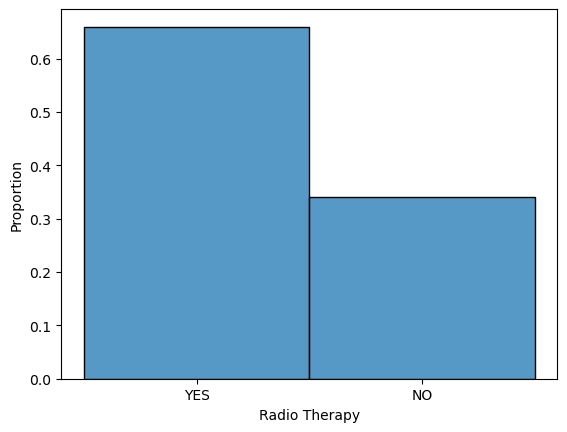

In [40]:
mb = pd.read_csv('metabric.csv')

y_therapy = mb['Radio Therapy']
sns.histplot(y_therapy ,stat='proportion')

> So the liklihood would be the following with an unknown value of p:
>> $$ L(p) = \prod_{i=1}^{n} (p^{y_i})(1-p)^{1-y_i} $$

> To maximize the liklihood with respect to $p$ we will take the log, get derivative with respect to $p$, and the maximize by setting that equal to zero:
>> $$ l(p) = \ln(L(p)) = \sum_{i=1}^{n} y_i\ln(p) + (1-y_i)\ln(1-p) $$
>> $$ l'(p) = \sum_{i=1}^{n} y_i\frac{1}{p} - (1-y_i)\frac{1}{1-p} $$
>> $$ \sum_{i=1}^{n} y_i\frac{1}{p} - (1-y_i)\frac{1}{1-p} = 0 $$
>> $$ \sum_{i=1}^{n} y_i\frac{1}{p} = \sum_{i=1}^{n} (1-y_i)\frac{1}{1-p} $$
>> $$ \frac{1}{p}\sum_{i=1}^{n} y_i = \frac{1}{1-p}\sum_{i=1}^{n} (1-y_i) $$
>> $$ (1-p)\sum_{i=1}^{n} y_i = p\sum_{i=1}^{n} (1-y_i) $$
>> $$ \sum_{i=1}^{n} y_i - p\sum_{i=1}^{n} y_i  = p\sum_{i=1}^{n} (1) - p\sum_{i=1}^{n}(y_i) $$
>> $$ \sum_{i=1}^{n} y_i  = pn $$
>> $$ \hat{p} = \frac{1}{n}\sum_{i=1}^{n} y_i $$

> so the MLE, $ \hat{p} $, is just the average of all values of $ y_i $, ..... total shocker

C:\Users\seths\AppData\Local\Temp\ipykernel_2952\487963966.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_therapy_num = y_therapy.replace({'NO':0,'YES':1})


MLE:  0.659717051377513


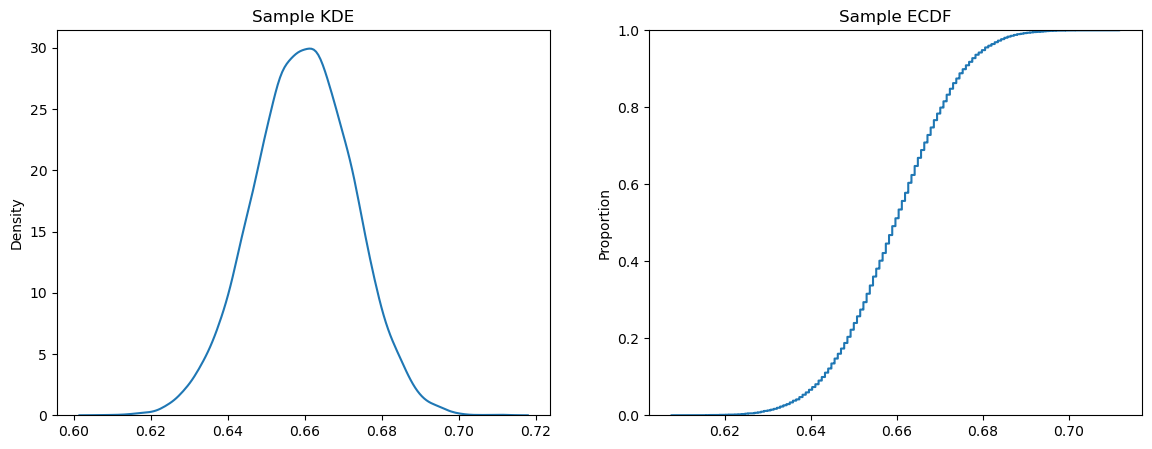

In [41]:
y_therapy_num = y_therapy.replace({'NO':0,'YES':1})
print(f'MLE: ', y_therapy_num.mean())

# why use for loop when can vectorize?
n = len(y_therapy_num)
n_samples = 10000
indices = rng.integers(0, n, size=(n_samples, n)) # creates n_sample arrays of size n with random indices (with replacement)
bootstraps = y_therapy_num.to_numpy()[indices]  # for each sample, takes the values at those indices
sample_means = bootstraps.mean(axis=1) # for each sample, takes the mean

fig, axes = plt.subplots(1,2,figsize=(14,5))
sns.kdeplot(x=sample_means, ax=axes[0], label='kde').set(title='Sample KDE')
sns.ecdfplot(x=sample_means, ax=axes[1], label='ecdf').set(title='Sample ECDF')
plt.show()

## 9.
- Open the Ames house price data. Make a KDE of 'price'. Select an appropriate distribution for modeling it, and explain why you selected it. (Hint: You might want to take a common transformation of price.)
- Derive the density for this distribution.
- Write out the likelihood.
- Maximize the likelihood. What is the MLE?
- Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.
- Bootstrap the sampling density/distribution of your parameters.

## 10.
- Open the METABRIC data. Make a KDE of 'Overall Survival (Months)'.
- Let survival time, $T$ be distributed exponentially with parameter $\lambda$. Then its distribution is
$$
F(t) = 1 - e^{-\lambda t} = p[T\le t].
$$
- Derive the density for this distribution.
- Write out the likelihood.
- Maximize the likelihood with respect to $\lambda$. What is the MLE, $\hat{\lambda}$?
- Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.
- Bootstrap the sampling density/distribution of $\hat{\lambda}$.

[Text(0.5, 1.0, 'KDE of Overall Survival (Months)')]

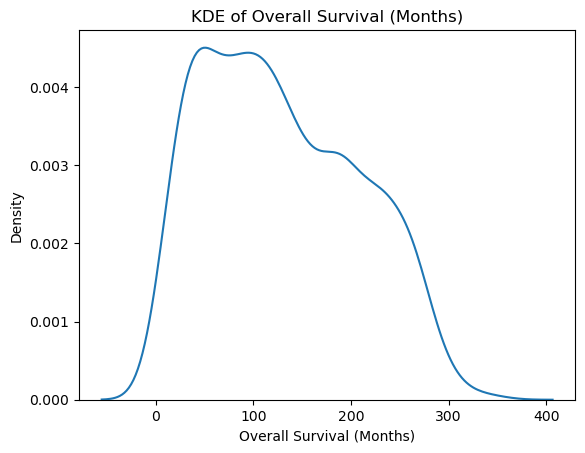

In [43]:
mb = pd.read_csv('metabric.csv')

y_survival = mb['Overall Survival (Months)']
sns.kdeplot(y_survival).set(title='KDE of Overall Survival (Months)')

> Find the density given the distribution $$ F(t) = 1 - e^{-\lambda t} = p[T\le t]$$
>> $$ F'(t) = \lambda e^{-\lambda t} $$

> Get the likelihood
>> $$ L(\lambda) = \prod_{i=1}^{n} \lambda e^{-\lambda t_i} $$

> To maximize the liklihood with respect to $\lambda$ we will take the log, get derivative with respect to $\lambda$, and the maximize by setting that equal to zero:
>> $$ l(\lambda) = \ln(L(\lambda)) = \sum_{i=1}^{n} \ln(\lambda e^{-\lambda t_i}) =  \sum_{i=1}^{n} \ln(\lambda) + \sum_{i=1}^{n} \ln(e^{-\lambda t_i}) = n\ln(\lambda) - \lambda\sum_{i=1}^{n} t_i $$
>> $$ l'(\lambda) = \frac{n}{\lambda} - \sum_{i=1}^{n} t_i $$
>> $$ \frac{n}{\lambda} - \sum_{i=1}^{n} t_i = 0 $$
>> $$ \frac{n}{\lambda} = \sum_{i=1}^{n} t_i $$
>> $$ \hat\lambda = \frac{n}{\sum_{i=1}^{n} t_i} $$
>> This is just the inverse of the sample mean

sample mean: 129.09429138744105
sample lambda: 0.007746275913926935


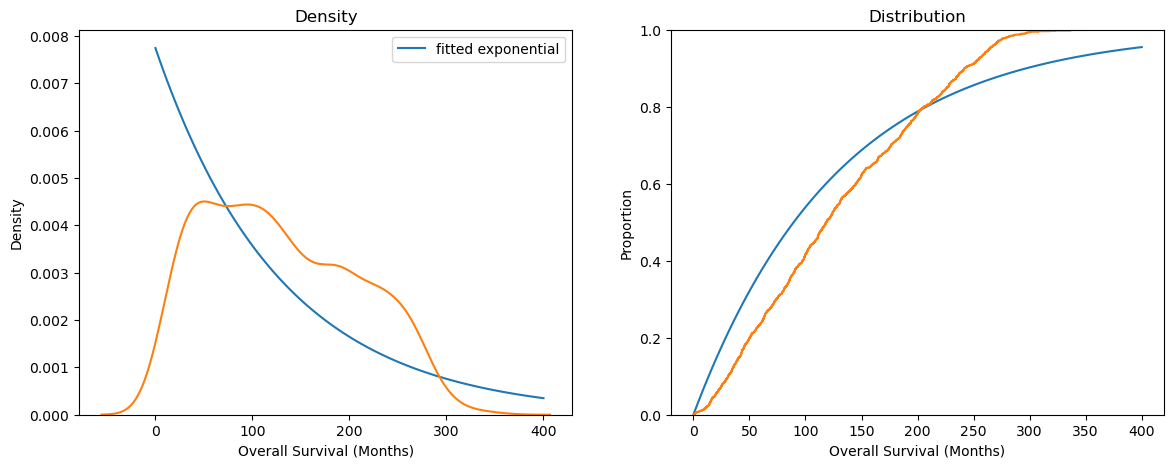

In [49]:
# Fit
lambda_hat = 1/np.mean(y_survival)
print(f"sample mean: {1/lambda_hat}")
print(f"sample lambda: {lambda_hat}")
grid = np.linspace(0,400,100)
cdf = sp.stats.expon.cdf(grid, scale=1/lambda_hat)  # scale parameter takes the inverse, so just the mean
pdf = sp.stats.expon.pdf(grid, scale=1/lambda_hat)

fig, axes = plt.subplots(1,2,figsize=(14,5))
sns.lineplot(x=grid, y=pdf, ax=axes[0], label='fitted exponential')
sns.kdeplot(x=y_survival, ax=axes[0], label='kde')
axes[0].set_title('Density')
sns.lineplot(x=grid, y=cdf,ax=axes[1])
sns.ecdfplot(x=y_survival, ax=axes[1])
axes[1].set_title('Distribution')
plt.show()

> The fitted exponential follows the general overall shape with the right skew but it certianly misses some characteristics of the data. The fitted exponential grows much faster than the sample and then tapers off to grow slower as the fitted goes towards infinity without hitting 1 while the sample hits 1 by 400 months. Good for general shape but much uncertainty there.

MLE:  0.007746275913926935


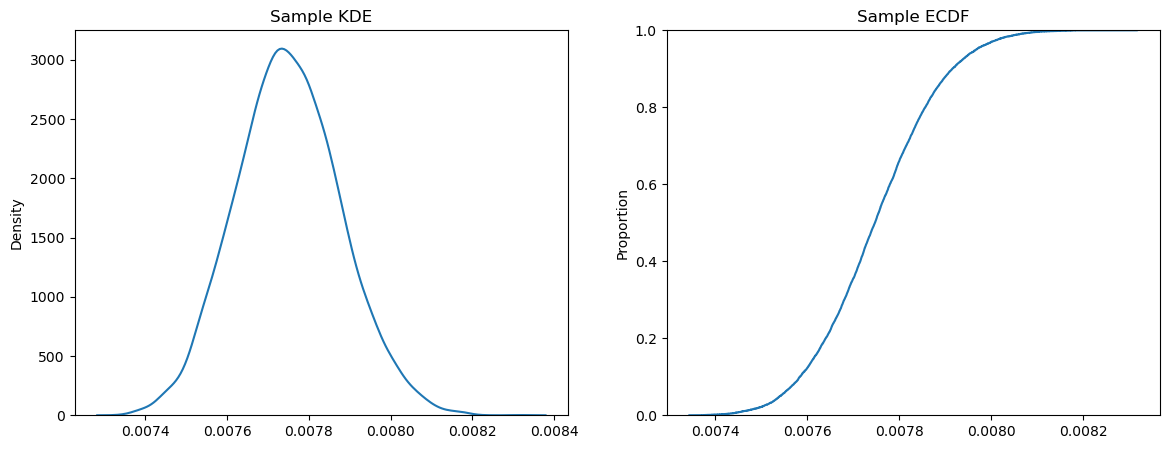

In [51]:
print(f'MLE: ', 1/y_survival.mean())

# why use for loop when can vectorize?
n = len(y_therapy_num)
n_samples = 10000
indices = rng.integers(0, n, size=(n_samples, n)) # creates n_sample arrays of size n with random indices (with replacement)
bootstraps = y_survival.to_numpy()[indices]  # for each sample, takes the values at those indices
sample_lambdas = 1/bootstraps.mean(axis=1) # for each sample, takes the mean

fig, axes = plt.subplots(1,2,figsize=(14,5))
sns.kdeplot(x=sample_lambdas, ax=axes[0], label='kde').set(title='Sample KDE')
sns.ecdfplot(x=sample_lambdas, ax=axes[1], label='ecdf').set(title='Sample ECDF')
plt.show()

## 11.
- Open the Ames house price data. Make a histogram of 'TotRms.AbvGrd', or total rooms above ground.
- We're going to model this using the Poisson Distribution. The probability that $y_i = k$ is given by
$$
pr[y_i = k ] = \frac{ \lambda^k e^{-\lambda} }{k!}
$$
- Write out the likelihood.
- Maximize the likelihood. What is the MLE? (Hint: The sample mean. As usual.)
- Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.
- Bootstrap the sampling density/distribution of your parameter.

## 12.
- Open the METABRIC data. Make a histogram of 'Mutation Count' with around 50 bins. Let $Y$ be the mutation count the random variable, and $y_i$ the mutation count for patient $i$.
- We're going to model this using the Poisson Distribution. The probability that $y_i = k$ is given by
$$
pr[y_i = k ] = \frac{ \lambda^k e^{-\lambda} }{k!}
$$
- Write out the likelihood.
- Maximize the likelihood. What is the MLE? (Hint: The sample mean. As usual.)
- Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.
- Bootstrap the sampling density/distribution of your parameter.